# Import libraries

In [1]:
import pandas as pd

In [2]:
import pickle
import warnings

In [3]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, euclidean
import numpy as np

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
from yellowbrick.cluster import kelbow_visualizer

In [6]:
warnings.filterwarnings('ignore')

# Read data

In [7]:
df = pd.read_csv('../../dataset/crop_db.csv')

In [8]:
df.head()

,crop,min_rainfall,max_rainfall,fertility
0,Rice,500,1000,2
1,Wheat,450,650,2
2,Sorghum,450,650,1
3,Maize,500,800,1
4,Sugarcane,150,550,2


In [9]:
# drop crops for kmeans

x = df.drop(['crop'], axis=1)

## elbow plot

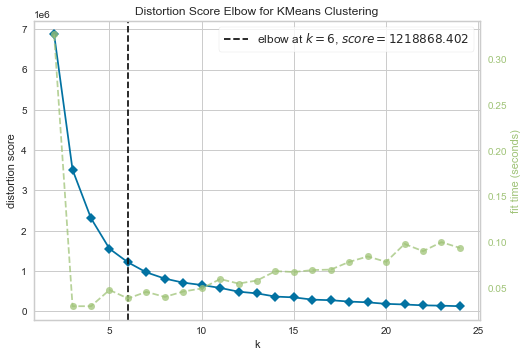

In [10]:
kv = kelbow_visualizer(KMeans(), x, k=(2,25))

# Build model

In [11]:
# initialize kmeans with optimum clusters from elbow plot

km = KMeans(n_clusters=6)

In [12]:
km.fit(x)

KMeans(n_clusters=6)

In [13]:
pred = km.predict(x)

In [15]:
# save kmeans model

with open('./crop_model_recom.cpickle', 'wb') as f:
    pickle.dump(km, f)

In [16]:
df1 = df.copy()

In [17]:
df1['km'] = pred

In [18]:
df1 = df1.drop(['min_rainfall', 'max_rainfall', 'fertility'], axis=1)

In [19]:
df1

,crop,km
0,Rice,5
1,Wheat,0
2,Sorghum,0
3,Maize,0
4,Sugarcane,3
...,...,...
69,Aniseed,3
70,Black Pepper,3
71,Cinnamon,5
72,Gingelly,4


In [20]:
# groupby the df into list

crop_recom = pd.DataFrame(df1.groupby(['km'])['crop'].apply(list))

In [21]:
# change the dataframe to dict

crop_recom = crop_recom['crop'].to_dict()

In [22]:
crop_recom

{0: ['Wheat',
  'Sorghum',
  'Maize',
  'Cotton',
  'Soybean',
  'Tomato',
  'Potato',
  'Groundnut',
  'Red Gram',
  'Green Gram',
  'Castor Seed',
  'Dry Beans',
  'Soyabean',
  'Coriander seeds',
  'Gilki',
  'Chickoo'],
 1: ['Banana', 'Cucumber', 'Cashew nuts'],
 2: ['Coffee',
  'Tea',
  'Linseed',
  'Green Onion',
  'Hot Pepper',
  'Radishe',
  'Ragi( naachnnii)',
  'Cluster Beans(Gavar)',
  'Mung beans',
  'Black Gram',
  'Rapeseed (Mohri)',
  'Mustard seeds',
  'Bottle Gourd'],
 3: ['Sugarcane',
  'Carrot',
  'Rubber',
  'Bell Pepper',
  'Horse Gram(kulthi)',
  'Capsicum',
  'Cauliflower',
  'Bajra(Pearl Millet)',
  'Brinjal',
  'Gooseberry(Amla)',
  'Apple',
  'Custard apple',
  'Dates',
  'Aniseed',
  'Black Pepper'],
 4: ['Onion',
  'Bean',
  'Cabbage',
  'Pea',
  'Ragi',
  'Barley',
  'Jowar',
  'Lentils',
  'Pigeon Peas',
  'Watermelon',
  'melon',
  'Tobacco',
  'chillies',
  'Sunflower',
  'Castor',
  'Millets',
  'Cow Peas',
  'Gingelly'],
 5: ['Rice',
  'Pineapple',
  '

In [23]:
# pickle the recommendation dict

with open('crop_recom.cpickle', 'wb') as f:
    pickle.dump(crop_recom, f)